# M9 Project: Kaggle Competition

**Dataset Description**

**Files**
  
* train.csv - the training set
* test.csv - the test set

**Columns**

* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In this project, I will use different models for predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0, i.e., a binary target class. Finally, I will choose the best one with an explanation.

# Step 1: Understanding the datasets

In [6]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

**Train dataset**

In [8]:
# Import train dataset
df_train = pd.read_csv('C:/Users/ASUS/Ashish/M9 - Project/train.csv')

In [9]:
print(df_train.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [10]:
print(df_train.shape)

(7613, 5)


In [11]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [12]:
# Find the number of positive and negative reviews
print('Number of whether a given tweet is about a real disaster or not: ', df_train.text.value_counts())

Number of whether a given tweet is about a real disaster or not:  text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
                                                                                                                                                ..
Escape The Heat (and the #ORShow) for a trail r

In [13]:
# Find the proportion of positive and negative reviews
print('Proportion of whether a given tweet is about a real disaster or not: ', df_train.text.value_counts() / len(df_train))

Proportion of whether a given tweet is about a real disaster or not:  text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        0.001314
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                     0.000788
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                              0.000788
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_    0.000788
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                 0.000657
                                                                                                                                                  ...   
Escape 

**Longest tweet**

In [15]:
length_text = df_train.text.str.len()

# How long is the longest review
print(max(length_text))

157


**Polarity and Subjectivity analysis**

In [17]:
# Import the required packages
from textblob import TextBlob

# Assuming df_train['text'] is a pandas Series containing text data
# Combine all text into a single string
combined_text = " ".join(df_train['text'].astype(str))

# Create a TextBlob object
blob_df_train = TextBlob(combined_text)

# Print out the sentiment
print(f"Polarity: {blob_df_train.sentiment.polarity}, Subjectivity: {blob_df_train.sentiment.subjectivity}")

Polarity: 0.08115547284332265, Subjectivity: 0.4811365706443649


* Polarity ~ 0.0811 suggests that the tweet may contain mild positive words or phrases.
* Subjectivity ~ 0.4811 indicates the tweets have a balanced mix of objectivity and subjectivity.

In [19]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
df_train['word_count_train'] = df_train['text'].apply(count_words)

# Print the average word count of the talks
print(df_train['word_count_train'].mean())

14.903585971364771


**Test dataset**

In [21]:
# Import train dataset
df_test = pd.read_csv('C:/Users/ASUS/Ashish/M9 - Project/test.csv')

In [22]:
print(df_test.head())

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [23]:
print(df_test.shape)

(3263, 4)


In [24]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [25]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
df_test['word_count_test'] = df_test['text'].apply(count_words)

# Print the average word count of the talks
print(df_test['word_count_test'].mean())

14.965369292062519


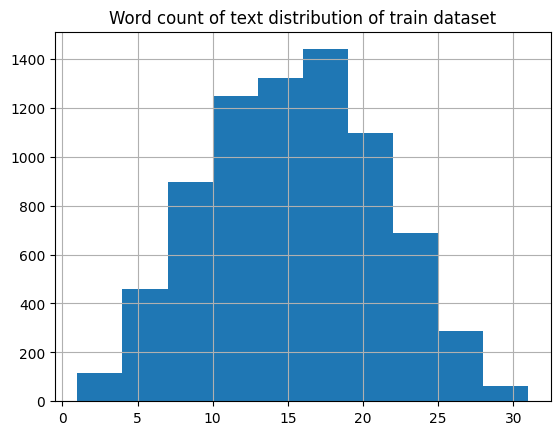

In [26]:
df_train['word_count_train'].hist()
plt.title('Word count of text distribution of train dataset')
plt.show()

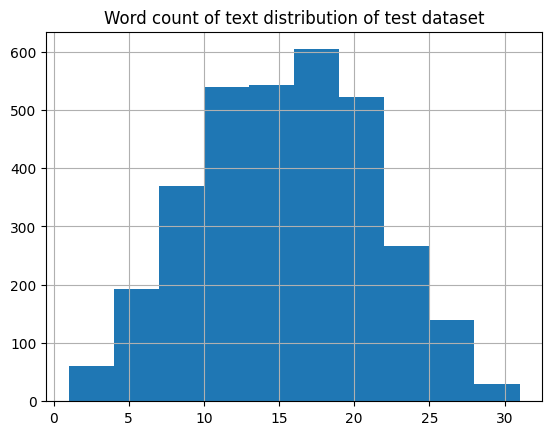

In [27]:
df_test['word_count_test'].hist()
plt.title('Word count of text distribution of test dataset')
plt.show()

# 1.1 Key Findings of the train and test datasets

**Training Data (df_train):** Contains 7613 rows and 5 columns (id, keyword, location, text, target).

* target: Binary variable indicating whether a tweet is about a real disaster (1) or not (0).
* keyword and location columns have missing values.
* Average word count: ~14.9 words per tweet.

**Test Data (df_test):** Contains 3263 rows and 4 columns (no target column).

* Average word count: ~14.96 words per tweet.

**Both datasets have the same text distribution**

# Step 2: Preprocessing the datasets

Preprocess the text column for both df_train and df_test to clean and standardize the data.

In [35]:
import spacy
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob

# Download NLTK stopwords
nltk.download('stopwords')

# Load spaCy model and stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess(text):
    doc = nlp(text.lower())  # Lowercase
    lemmas = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]
    return ' '.join(lemmas)

# Apply preprocessing
df_train['cleaned_text'] = df_train['text'].apply(preprocess)
df_test['cleaned_text'] = df_test['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 3: Feature Engineering

Add features like:

* word_count: Number of words in the tweet.
* has_hashtag: Whether the tweet contains a hashtag (#).
* has_mention: Whether the tweet contains a mention (@).
* uppercase_count: Count of uppercase words.
* sentiment: Sentiment polarity of the tweet.

In [38]:
def add_features(df):
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    df['has_hashtag'] = df['cleaned_text'].str.contains('#').astype(int)
    df['has_mention'] = df['cleaned_text'].str.contains('@').astype(int)
    df['uppercase_count'] = df['cleaned_text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))
    df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

# Add features to both datasets
df_train = add_features(df_train)
df_test = add_features(df_test)

**Explainability**

Use feature importance to understand the model.

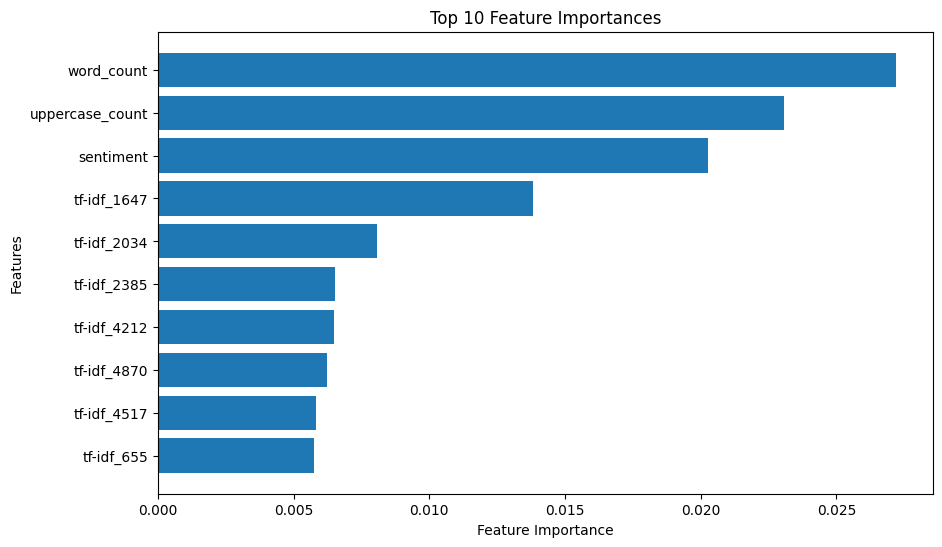

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Vectorize text data
tfidf = TfidfVectorizer(max_features=5000)
X_train_text = tfidf.fit_transform(df_train['cleaned_text'])
X_test_text = tfidf.transform(df_test['cleaned_text'])

# Convert TF-IDF matrix to DataFrame with string column names
X_train_text_df = pd.DataFrame(X_train_text.toarray(), columns=[str(i) for i in range(X_train_text.shape[1])])
X_test_text_df = pd.DataFrame(X_test_text.toarray(), columns=[str(i) for i in range(X_test_text.shape[1])])

# Add additional features
additional_features_train = df_train[['word_count', 'has_hashtag', 'has_mention', 'uppercase_count', 'sentiment']].reset_index(drop=True)
additional_features_test = df_test[['word_count', 'has_hashtag', 'has_mention', 'uppercase_count', 'sentiment']].reset_index(drop=True)

# Combine text and additional features
X_train = pd.concat([X_train_text_df, additional_features_train], axis=1)
X_test = pd.concat([X_test_text_df, additional_features_test], axis=1)

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, df_train['target'])

# Get feature importances
feature_importances = model.feature_importances_

# Combine TF-IDF and additional feature names
feature_names = [f'tf-idf_{i}' for i in range(X_train_text.shape[1])] + ['word_count', 'has_hashtag', 'has_mention', 'uppercase_count', 'sentiment']

# Get the indices of the top 10 important features
sorted_indices = np.argsort(feature_importances)[-10:]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances")
plt.show()

**Save the data**

In [102]:
# Save preprocessed training data
train_output_path = "train_processed.csv"
df_train.to_csv(train_output_path, index=False)
print(f"Training data saved to {train_output_path}")

# Save preprocessed testing data
test_output_path = "test_processed.csv"
df_test.to_csv(test_output_path, index=False)
print(f"Testing data saved to {test_output_path}")

Training data saved to train_processed.csv
Testing data saved to test_processed.csv


# Step 4: Model Building

**Logistics Regression Model**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
import scipy.sparse as sp

# Vectorize text with TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(df_train['cleaned_text'])
X_test_tfidf = tfidf.transform(df_test['cleaned_text'])

# Combine TF-IDF with other features
X_train = sp.hstack([
    X_train_tfidf,
    df_train[['word_count', 'has_hashtag', 'has_mention', 'uppercase_count', 'sentiment']].values
])
y_train = df_train['target']

# Split data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_split, y_train_split)

# Evaluate the model
y_pred_lr = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_lr))
print("Classification Report:\n", classification_report(y_val, y_pred_lr))

Validation Accuracy: 0.8003939592908733
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.83       874
           1       0.81      0.70      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



**Random Forest Model**

In [45]:
# Train a RandomForest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train_split, y_train_split)

# Evaluate the model
y_pred_rf = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))

Validation Accuracy: 0.7793827971109653
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       874
           1       0.81      0.63      0.71       649

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.77      1523
weighted avg       0.78      0.78      0.77      1523



**Support Vector Machines (SVM)**

In [47]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report

# Train LinearSVC model without probability
svc_model = LinearSVC(random_state=42)
svc_model.fit(X_train_split, y_train_split)

# Calibrate the model for probability estimates
calibrated_model = CalibratedClassifierCV(svc_model, method='sigmoid')
calibrated_model.fit(X_train_split, y_train_split)

# Predict and evaluate
y_pred_svc = calibrated_model.predict(X_val)

print("SVC Validation Accuracy:", accuracy_score(y_val, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_val, y_pred_svc))


C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC Validation Accuracy: 0.7866053841103086
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       874
           1       0.78      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.78      1523



C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**XGBoost Model**

In [49]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_split, y_train_split)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_val)

print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Validation Accuracy: 0.7616546290216678
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       874
           1       0.81      0.58      0.67       649

    accuracy                           0.76      1523
   macro avg       0.77      0.74      0.74      1523
weighted avg       0.77      0.76      0.75      1523



**Gradiant Boosting with LightGBM**

In [51]:
from lightgbm import LGBMClassifier

# Train LightGBM model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_split, y_train_split)

# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_val)

print("LightGBM Validation Accuracy:", accuracy_score(y_val, y_pred_lgb))
print("LightGBM Classification Report:\n", classification_report(y_val, y_pred_lgb))

[LightGBM] [Info] Number of positive: 2622, number of negative: 3468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8682
[LightGBM] [Info] Number of data points in the train set: 6090, number of used features: 566
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430542 -> initscore=-0.279641
[LightGBM] [Info] Start training from score -0.279641
LightGBM Validation Accuracy: 0.7695338148391333
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       874
           1       0.77      0.66      0.71       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



# Step 5: Model Performance Comparison

In [53]:
scores = {
    "Model": ["Logistic Regression", 
              "Random Forest",
              "Support Vector Machines",
              "XGBoost", 
              "LightGBM"],    
    "Accuracy": [
        accuracy_score(y_val, y_pred_lr),
        accuracy_score(y_val, y_pred_rf),
        accuracy_score(y_val, y_pred_svc),
        accuracy_score(y_val, y_pred_xgb),
        accuracy_score(y_val, y_pred_lgb)
    ],
    "F1 Score": [
        f1_score(y_val, y_pred_lr),
        f1_score(y_val, y_pred_rf),
        f1_score(y_val, y_pred_svc),
        f1_score(y_val, y_pred_xgb),
        f1_score(y_val, y_pred_lgb)
    ]
}

# Convert to DataFrame for visualization
import pandas as pd
results_df = pd.DataFrame(scores)
print(results_df)

                     Model  Accuracy  F1 Score
0      Logistic Regression  0.800394  0.748344
1            Random Forest  0.779383  0.707826
2  Support Vector Machines  0.786605  0.735557
3                  XGBoost  0.761655  0.674439
4                 LightGBM  0.769534  0.708714


# Step 6: Conclusion

**Accuracy Score:**

Among the five models, the Logistic Regression model correctly predicted the target labels with ~80% accuracy of the test samples of tweet dataset.

**F1 Score:**

This score balances precision and recall, suggesting Logistic Regression model is relatively good at both detecting true positives and avoiding false positives comparing to other four models.

**Model Strength:**

* Models like Logistic Regression excel in linear relationships, while Random Forest, XGBoost and LightGBM can capture complex, non-linear patterns.
* SVMs are robust to high-dimensional spaces, which might contribute uniquely to the meta-model.

**Stacking:**

All though a stacked model can reduce the bias of simple models and the variance of complex models, but adding stacking layers increases model complexity.

**RECOMMENDATION**

Comparing the five models along with stacking extention, Logistic Regression is the best performer of this given sample test tweet dataset.